# Finding Shapes

In [1]:
(ns thriving-drylands
  (:require
  [opencv4.core :refer :all]
  [opencv4.colors.rgb :as rgb]
  [opencv4.utils :as u]))

nil

In [2]:
(defn approx [c]
  (let[m2f (new-matofpoint2f (.toArray c))
       len (arc-length m2f true)
       ret (new-matofpoint2f)
       app (approx-poly-dp m2f ret (* 0.02 len) true)]
    ret))


#'thriving-drylands/approx

In [3]:
(defn how-many-sides[c]
  (let[nb-sides (.size (.toList  (approx c)))]
    nb-sides))

#'thriving-drylands/how-many-sides

In [4]:
(defn which-color[c]
  (condp = (how-many-sides c)
   1 rgb/pink
   2 rgb/magenta
   3 rgb/green
   4 rgb/blue
   5  rgb/yellow-1
   6 rgb/cyan-2
   rgb/orange)
  )

#'thriving-drylands/which-color

In [5]:
(defn draw-contours! [img contours]
 (dotimes [i (.size contours)]
    (let [c (.get contours i)]
	 (draw-contours img contours i (which-color c) 3)))
   img)

#'thriving-drylands/draw-contours!

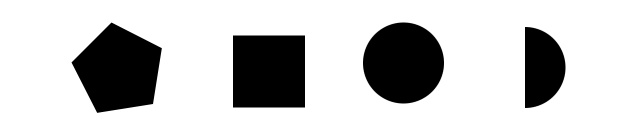

In [6]:
(def shapes 
  (-> "resources/morph/shapes3.jpg" (imread IMREAD_REDUCED_COLOR_2)))

(u/>>> shapes)

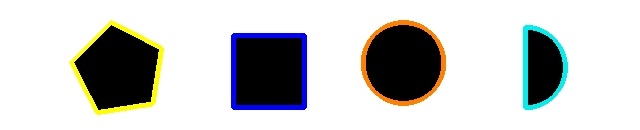

In [7]:
(defn draw-contours! [img contours]
 (dotimes [i (.size contours)]
    (let [c (.get contours i)]
	 (draw-contours img contours i (which-color c) 3)))
   img)


(def thresh (-> shapes clone (cvt-color! COLOR_BGR2GRAY) (threshold! 210 240 1)))
(u/>>> thresh)
(def contours (new-arraylist))

(find-contours thresh contours (new-mat) RETR_LIST CHAIN_APPROX_SIMPLE)
    (-> shapes
      (draw-contours! contours)
      (u/>>>))

### Hand Drawn Shapes

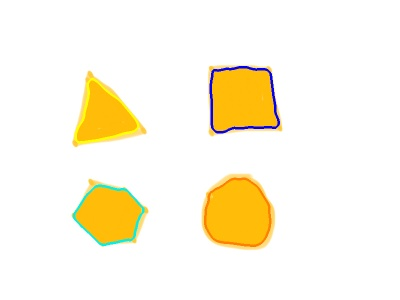

In [9]:
(def shapes2
  (-> "resources/chapter03/hand_shapes.jpg" (imread IMREAD_REDUCED_COLOR_2)))
(u/>>> shapes2)

(def thresh 
  (-> shapes2 clone (cvt-color! COLOR_BGR2GRAY) (threshold! 200 250 1) (median-blur! 17) ))

;(u/>>> thresh)

 (let[ contours (new-arraylist)]
    (find-contours thresh contours (new-mat) RETR_LIST CHAIN_APPROX_SIMPLE)
    (-> shapes2
        clone
      (draw-contours! contours)
      (u/resize-by 0.5)
      (u/>>>)))

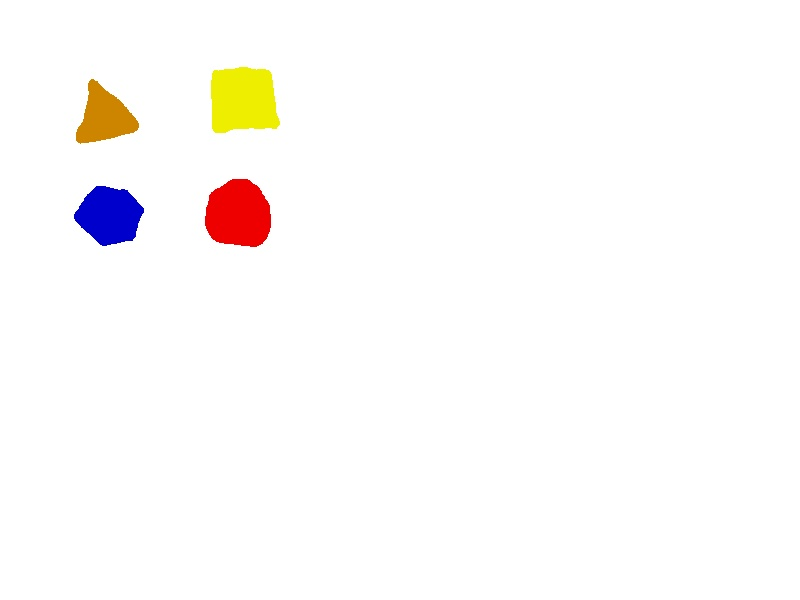

In [14]:
(def drawing (u/mat-from shapes2))
(set-to drawing rgb/white)

(let[ contours (new-arraylist)]
    (find-contours thresh contours (new-mat) RETR_LIST CHAIN_APPROX_SIMPLE)
  (doseq [c contours]
    (fill-convex-poly drawing c (rand-nth [rgb/orange-3 rgb/blue-3 rgb/red-2 rgb/green-2 rgb/yellow-2]) LINE_4 1)))

(u/>>> drawing)

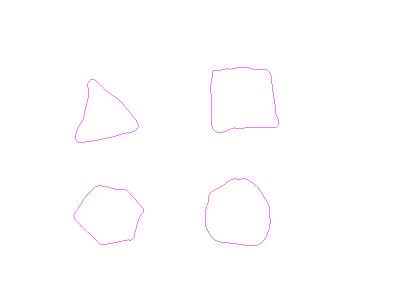

In [15]:
(set-to drawing rgb/white)

(let[ contours (new-arraylist)]
    (find-contours thresh contours (new-mat) RETR_LIST CHAIN_APPROX_SIMPLE)
    (polylines drawing contours true rgb/magenta-2))

(-> drawing clone (u/resize-by 0.5) u/>>>)

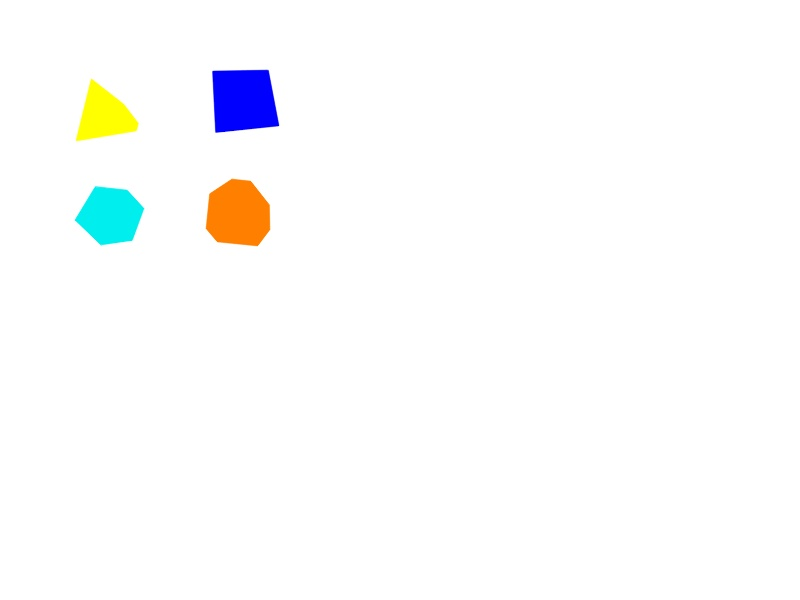

In [16]:
(defn approx_ 
  ([c] (approx_ c 0.02))
  ([c factor]
  (let[m2f (new-matofpoint2f (.toArray c))
       len (arc-length m2f true)
       ret (new-matofpoint2f)]
    (approx-poly-dp m2f ret (* factor len) true)
    (new-matofpoint (.toArray ret)))))

(set-to drawing rgb/white)
(let[ contours (new-arraylist)]
    (find-contours thresh contours (new-mat) RETR_LIST CHAIN_APPROX_SIMPLE)
  (doseq [c contours]
   (fill-convex-poly drawing
                     (approx_ c)
                     (which-color c) LINE_AA 1)))


(u/>>> drawing)
